# Intially we have tried gathering information from imdb dataset collected from kaggle and had little progress

In [2]:
#requirements for imdb dataset collected from kaggle
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import plotly.plotly as py
import numpy as np
import pandas as pd

In [3]:
#providing the path of the csv file that we are using
movie_file = 'C:\\Users\\annea\\.spyder-py3\\codes\\movie.metadata.csv'
df = pd.read_csv(movie_file, header=None)

### The movie dataset shows several features like director name, facebook likes, critic reviews etc.

In [4]:
#shows all the details in the dataset
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
1,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,CCH Pounder,Avatar,...,4834,Wes Studi,3054,USA,PG-13,237000000,2009,936,7.9,33000
2,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Johnny Depp,Pirates of the Caribbean: At World's End,...,48350,Jack Davenport,1238,USA,PG-13,300000000,2007,5000,7.1,0
3,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Christoph Waltz,Spectre,...,11700,Stephanie Sigman,994,UK,PG-13,245000000,2015,393,6.8,85000
4,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Tom Hardy,The Dark Knight Rises,...,106759,Joseph Gordon-Levitt,2701,USA,PG-13,250000000,2012,23000,8.5,164000


In [6]:
#changing the header for easier understanding of the dataset
new_header = df.iloc[0] #grab the first row for the header
df = df[0:] #take the data less the header row
df.rename(columns = new_header , inplace=True )
df.head(5)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
1,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,CCH Pounder,Avatar,...,4834,Wes Studi,3054,USA,PG-13,237000000,2009,936,7.9,33000
2,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Johnny Depp,Pirates of the Caribbean: At World's End,...,48350,Jack Davenport,1238,USA,PG-13,300000000,2007,5000,7.1,0
3,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Christoph Waltz,Spectre,...,11700,Stephanie Sigman,994,UK,PG-13,245000000,2015,393,6.8,85000
4,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Tom Hardy,The Dark Knight Rises,...,106759,Joseph Gordon-Levitt,2701,USA,PG-13,250000000,2012,23000,8.5,164000


In [9]:
df.drop(df.index[0] , inplace=True)
df.head(5)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,cast_total_facebook_likes,actor_3_name,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
1,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,CCH Pounder,Avatar,...,4834,Wes Studi,3054,USA,PG-13,237000000,2009,936,7.9,33000
2,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Johnny Depp,Pirates of the Caribbean: At World's End,...,48350,Jack Davenport,1238,USA,PG-13,300000000,2007,5000,7.1,0
3,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Christoph Waltz,Spectre,...,11700,Stephanie Sigman,994,UK,PG-13,245000000,2015,393,6.8,85000
4,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Tom Hardy,The Dark Knight Rises,...,106759,Joseph Gordon-Levitt,2701,USA,PG-13,250000000,2012,23000,8.5,164000
5,Doug Walker,NaN,NaN,131,NaN,Rob Walker,131,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,...,143,NaN,NaN,NaN,NaN,NaN,NaN,12,7.1,0


## grouping the dataset into a smaller one , arranged to show movies with higher percentage and good imdb score. We noticed that reviews did play an important role by looking at the num_user_for_reviews column.

In [10]:
df_group = df.groupby(['movie_title','gross','country']).agg({'imdb_score':'max' , 'num_user_for_reviews' : 'max'}).reset_index()
type(df_group['num_user_for_reviews'])
df_group['percentage'] = pd.to_numeric(df_group['imdb_score']).div(10)*100
df_group.sort_values(['imdb_score' , 'movie_title', 'country' , 'num_user_for_reviews' , 'gross'] , ascending = [0,1,2,3,4])

,movie_title,gross,country,imdb_score,num_user_for_reviews,percentage
3547,The Shawshank Redemption,28341469,USA,9.3,4144,93.0
3139,The Godfather,134821952,USA,9.2,2238,92.0
808,Dekalog,447093,Poland,9.1,37,91.0
3048,The Dark Knight,533316061,USA,9,4667,90.0
3138,The Godfather: Part II,57300000,USA,9,650,90.0
2315,Pulp Fiction,107930000,USA,8.9,2195,89.0
2504,Schindler's List,96067179,USA,8.9,1273,89.0
3149,"The Good, the Bad and the Ugly",6100000,Italy,8.9,780,89.0
3334,The Lord of the Rings: The Return of the King,377019252,USA,8.9,3189,89.0
1065,Fight Club,37023395,USA,8.8,2968,88.0


## grouping the countries with their maximum imdb score

In [12]:
by_country = df_group.groupby('country' , as_index=False)
newdf = by_country.max()
newdf

,country,movie_title,gross,imdb_score,percentage
0,Afghanistan,Osama,1127331,7.4,74.0
1,Argentina,The Secret in Their Eyes,304124,8.2,82.0
2,Aruba,Knock Off,10076136,4.8,48.0
3,Australia,Travelers and Magicians,9003011,8.1,81.0
4,Belgium,Thunder and the House of Magic,4091,7.1,71.0
5,Brazil,The Second Mother,8060,8.7,87.0
6,Cameroon,Sisters in Law,32631,7.5,75.0
7,Canada,eXistenZ,9975684,8.2,82.0
8,Chile,The 33,12188642,6.9,69.0
9,China,The Promise,9213,7.9,79.0


## plotting the max imdb score along with their countries

In [13]:
data = dict(
        type = 'choropleth',
        colorscale = 'Picnic',
        reversescale = True,
        locations = newdf['country'],
        locationmode = 'country names',
        z = newdf['imdb_score'],
        text = newdf['country'],
        colorbar = {'title' : 'imdb score'},
      ) 

layout = dict(title = 'Countries with their max imdb score',
                geo = dict(showframe = False,projection = {'type':'Mercator'})
             )

### We tried to plot the maximum imdb scores of each country. Following plot shows the maximum imdb scores of a movie of each country.

In [41]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False, filename = 'd3-world-map.html')

# We were unable to analyse reviews as they were sentences and we needed to convert words to vectors. so we went ahead and used the dataset already available by keras.

Training data: 
X is
(50000,)
(50000,)
Classes: 
[0 1]


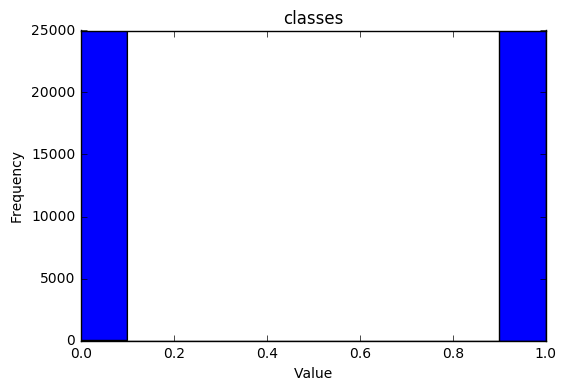

In [29]:
import numpy as np
from keras.datasets import imdb
from matplotlib import pyplot
import matplotlib as plt
#import seaborn as sns

# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# summarize size
print("Training data: ")
print("X is" )
#print(X)
#print("y is")
#print(y)
print(X.shape)
print(y.shape)



# Summarize number of classes
print("Classes: ")
print(np.unique(y))

#plotting a histogram of classification ( 0 and 1 )
pyplot.hist(y , color = 'blue')
pyplot.title("classes")
pyplot.xlabel("Value")
pyplot.ylabel("Frequency")
pyplot.show()



In [18]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))



Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


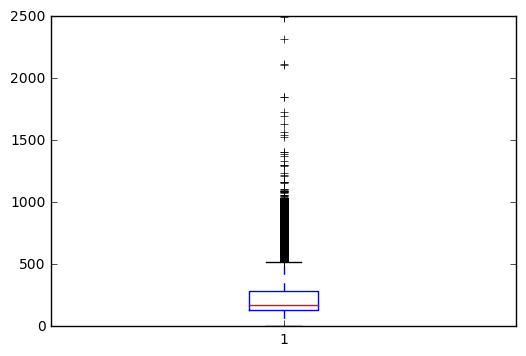

In [19]:
# Summarize review length
print("Review length: ")
result = list(map(len, X))
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

# plot review length
pyplot.boxplot(result)
pyplot.show()

## Multi-layer perceptron model 

In [21]:
# MLP for the IMDB problem

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [22]:
# load the dataset but only keep the top n words, zero the rest
top_words = 4000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [23]:
max_words = 400
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [24]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 32)           128000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               3200250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 3,328,501
Trainable params: 3,328,501
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, verbose=1)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 49s - loss: 0.5043 - acc: 0.7138 - val_loss: 0.3052 - val_acc: 0.8690
Epoch 2/5
25000/25000 [==============================] - 48s - loss: 0.1905 - acc: 0.9282 - val_loss: 0.3199 - val_acc: 0.8700
Epoch 3/5
25000/25000 [==============================] - 47s - loss: 0.0623 - acc: 0.9822 - val_loss: 0.4333 - val_acc: 0.8561
Epoch 4/5
25000/25000 [==============================] - 45s - loss: 0.0123 - acc: 0.9984 - val_loss: 0.5226 - val_acc: 0.8593
Epoch 5/5
25000/25000 [==============================] - 50s - loss: 0.0022 - acc: 0.9999 - val_loss: 0.5782 - val_acc: 0.8597
Accuracy: 85.97%


## model using Convolutional Neural Network

In [26]:
# CNN for the IMDB problem

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load the dataset but only keep the top n words, zero the rest
top_words = 4000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# pad dataset to a maximum review length in words
max_words = 400
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [27]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 32)           128000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 400, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               1600250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 1,731,605
Trainable params: 1,731,605
Non-trainable params: 0
_________________________________________________________________


C:\Users\annea\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning:

Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="same", filters=32, kernel_size=3)`

C:\Users\annea\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning:

Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`



In [28]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 60s - loss: 0.4421 - acc: 0.7637 - val_loss: 0.3099 - val_acc: 0.8659
Epoch 2/2
25000/25000 [==============================] - 57s - loss: 0.2376 - acc: 0.9072 - val_loss: 0.2799 - val_acc: 0.8823
Accuracy: 88.23%


## We were successful in analysing the models implemented by multilayer perceptron and convolutional neural network and we could conclude that CNN model was successful in generating more accurate results given the huge dataset with many movie reviews.